In [1]:
import pandas as pd

STARTEGIES = [
    # "CPU_1CORE_LINEAR",
    # "CPU_NCORE_LINEAR",
    "CPU_1CORE_BINARY",
    "CPU_NCORE_BINARY",
    "CPU_1CORE_BINARY_ONEWAY",
    "CPU_NCORE_BINARY_ONEWAY",
    # "GPU_LINEAR",
    "GPU_BINARY",
    "GPU_BINARY_ONEWAY",
]

FIGURE_PATH = "/home/tudny/Documents/UW/MIMUW/HPC/HPC-Cuda-PZ/report/img"

result_time_df = pd.read_csv("results_from_entropy.csv")

SIZES = [10000, 100000, 1000000, 10000000]

In [2]:
import matplotlib.pyplot as plt

def boxplot_time(time_param: str, unit: str, io_str: str = ""):
    for query_size in SIZES:
        plt.figure()
        df = result_time_df[result_time_df["query_size"] == query_size]
        plt.boxplot([df[df["strategy"] == strategy][time_param] for strategy in STARTEGIES], labels=STARTEGIES)
        plt.title(f"Time taken to resolve query (with{io_str} IO) N={query_size}")
        plt.xticks(rotation=60, ha="right")
        plt.xlabel("Strategy")
        plt.ylabel(f"Time taken [{unit}]")
        plt.savefig(f"{FIGURE_PATH}/time_boxplot_N{query_size}_{time_param}.png", bbox_inches='tight')
        plt.show()

def mean_bar_time(time_param: str, unit: str, io_str: str = ""):
    for query_size in SIZES:
        plt.figure()
        df = result_time_df[result_time_df["query_size"] == query_size]
        for strategy in STARTEGIES:
            strategy_mean_time = df[df["strategy"] == strategy][time_param].mean()
            plt.text(strategy, strategy_mean_time, f"{strategy_mean_time:.2f}", ha="center", va="bottom")
        data = df.groupby("strategy")[time_param].mean()
        plt.bar(data.index, data)
        plt.title(f"Time taken to resolve query (with{io_str} IO) N={query_size}")
        plt.xticks(rotation=60, ha="right")
        plt.xlabel("Strategy")
        plt.ylabel(f"Time taken [{unit}]")
        plt.savefig(f"{FIGURE_PATH}/time_bar_N{query_size}_{time_param}.png", bbox_inches='tight')
        plt.show()

def mean_speedup_plot_of_size_by_algorithm(time_param: str, unit: str, io_str: str = ""):
    df = result_time_df
    def _plot_speedup(concurrent_unit: str):
        for algorithm in ["BINARY", "BINARY_ONEWAY"]:
            cpu_1core_mean_time = df[(df["strategy"] == f"CPU_1CORE_{algorithm}")].groupby("query_size")[time_param].mean()
            res_mean_time = df[(df["strategy"] == f"{concurrent_unit}_{algorithm}")].groupby("query_size")[time_param].mean()
            X = cpu_1core_mean_time / res_mean_time
            plt.plot(X, label=f"{algorithm} {concurrent_unit}")
            plt.xlabel("Query size (N)")
            plt.ylabel(f"Speedup (CPU_1CORE/{concurrent_unit}) with{io_str} IO")
            plt.xscale("log")
    plt.figure()
    _plot_speedup("CPU_NCORE")
    _plot_speedup("GPU")
    plt.title(f"Speedup")
    plt.legend()
    plt.savefig(f"{FIGURE_PATH}/speedup_{time_param}.png", bbox_inches='tight')
    plt.show()

def mean_time_plt_of_size_by_algorithm(time_param: str, unit: str, io_str: str = ""):
    df = result_time_df
    def _plot_speedup(concurrent_unit: str):
        for algorithm in ["BINARY", "BINARY_ONEWAY"]:
            X = df[(df["strategy"] == f"{concurrent_unit}_{algorithm}")].groupby("query_size")[time_param].mean()
            plt.plot(X, label=f"{algorithm} {concurrent_unit}")
            plt.xlabel("Query size (N)")
            plt.ylabel(f"Time taken [{unit}]")
            plt.xscale("log")
    plt.figure()
    _plot_speedup("CPU_NCORE")
    _plot_speedup("GPU")
    plt.title(f"Time taken with{io_str} IO")
    plt.legend()
    plt.savefig(f"{FIGURE_PATH}/time_N_{time_param}.png", bbox_inches='tight')
    plt.show()



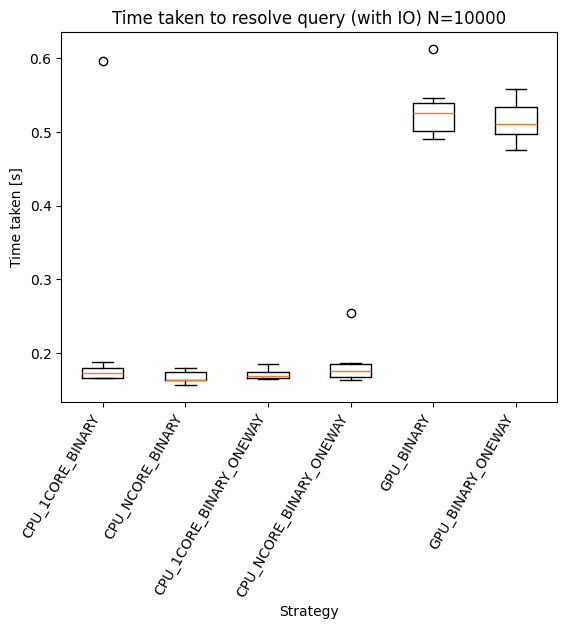

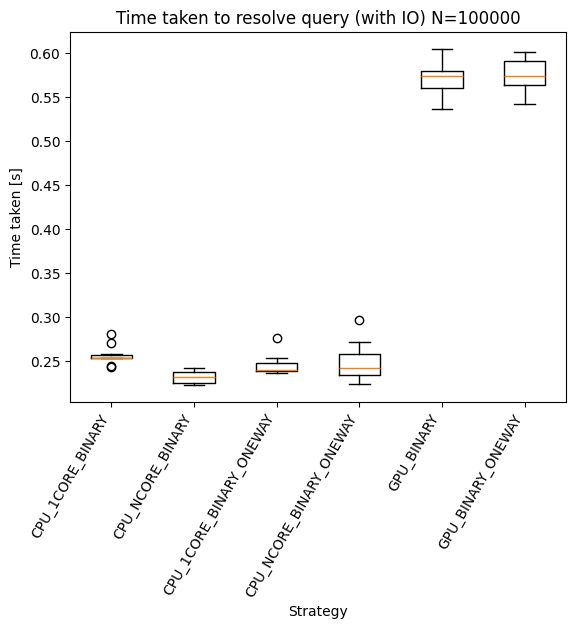

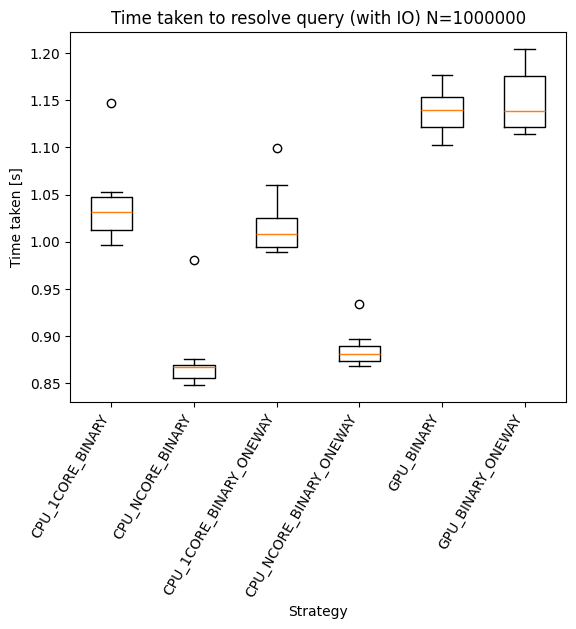

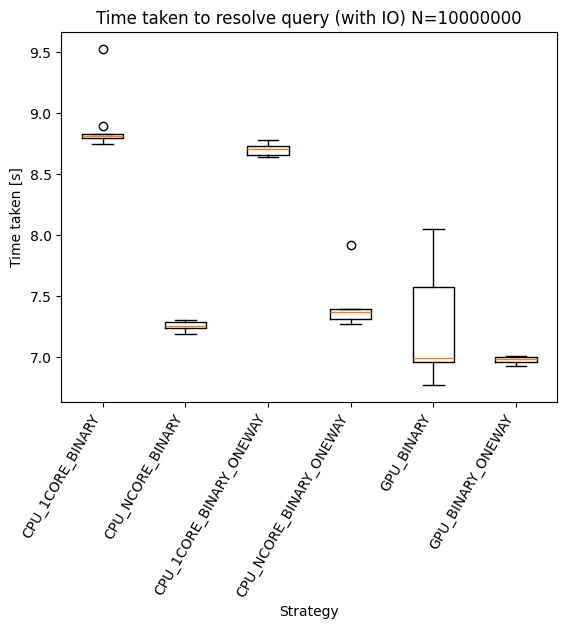

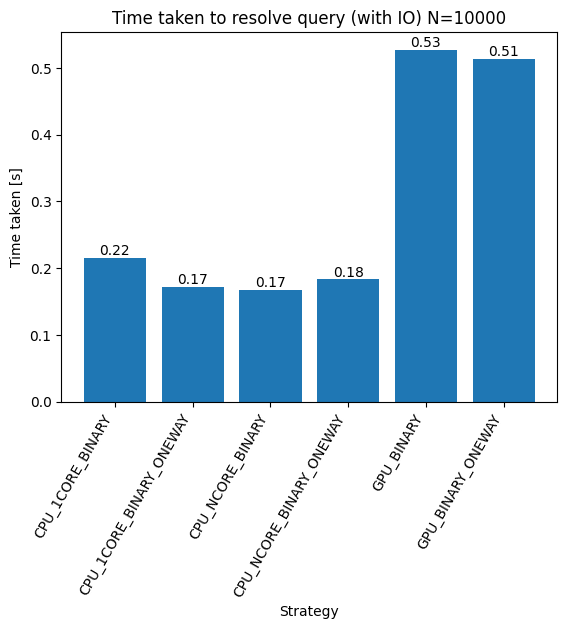

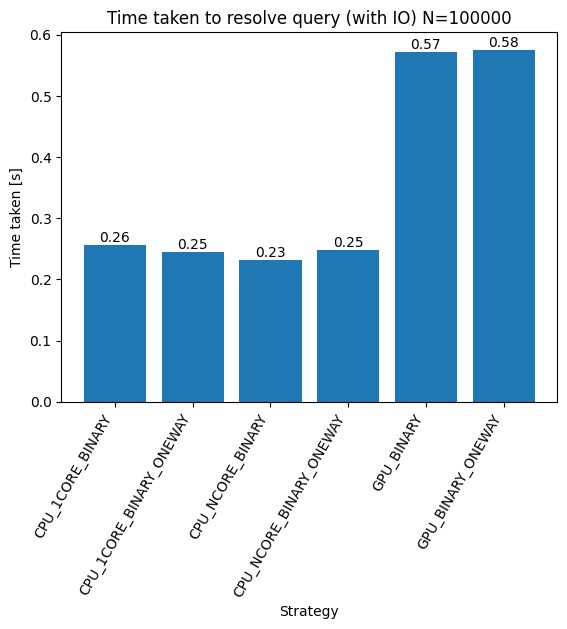

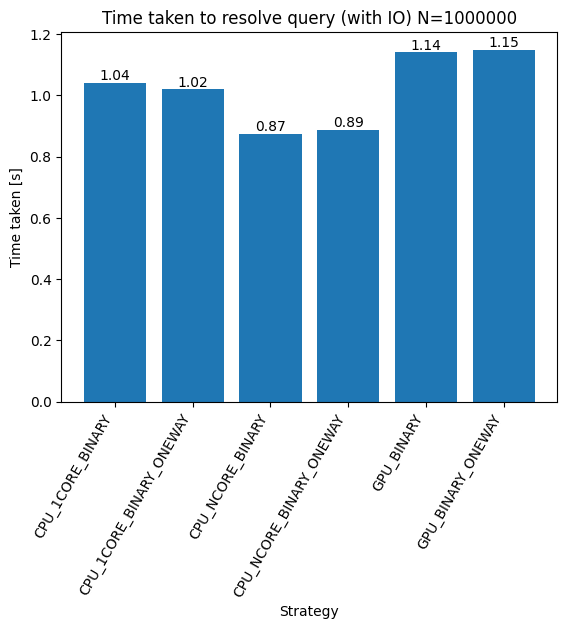

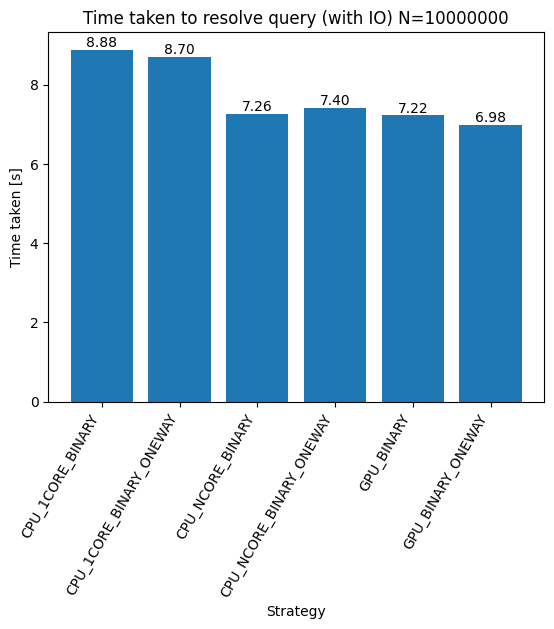

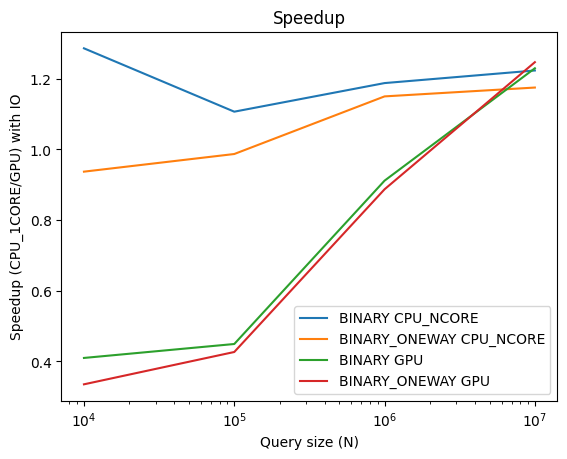

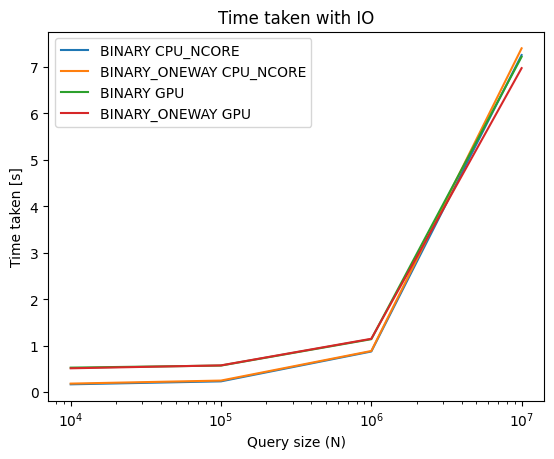

In [3]:
boxplot_time("total_time", "s")
mean_bar_time("total_time", "s")
mean_speedup_plot_of_size_by_algorithm("total_time", "s")
mean_time_plt_of_size_by_algorithm("total_time", "s")

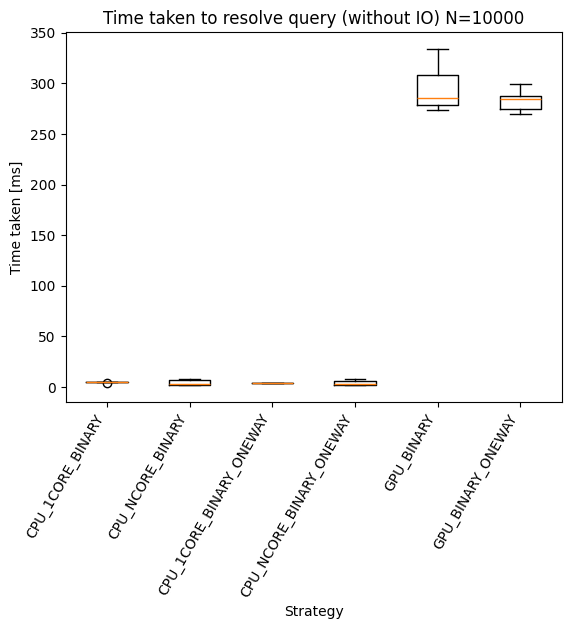

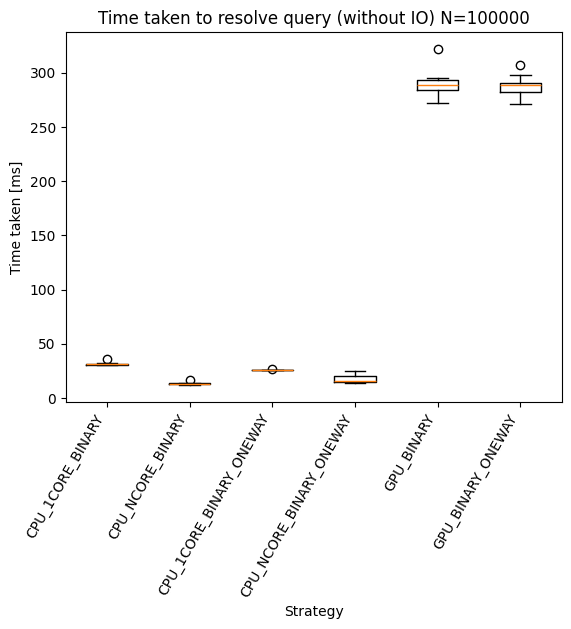

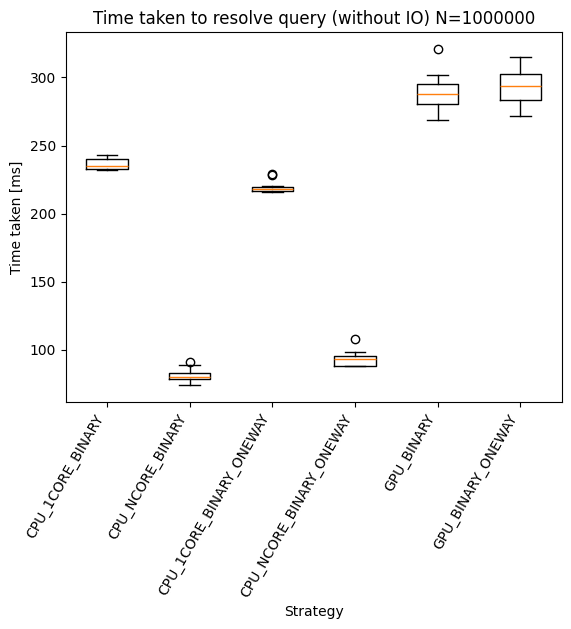

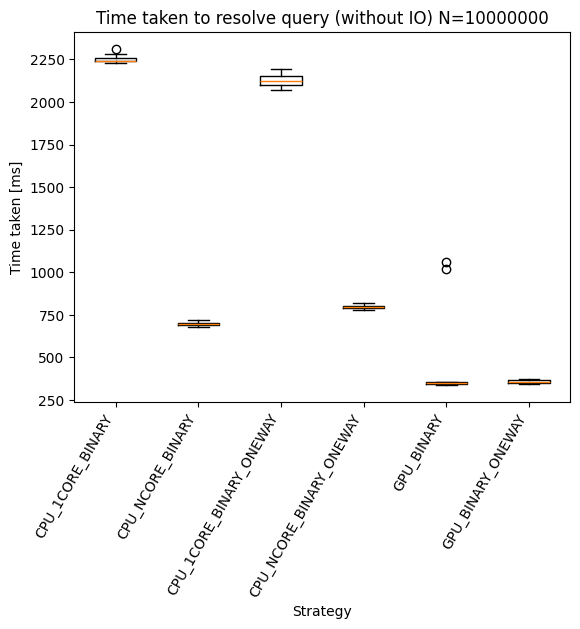

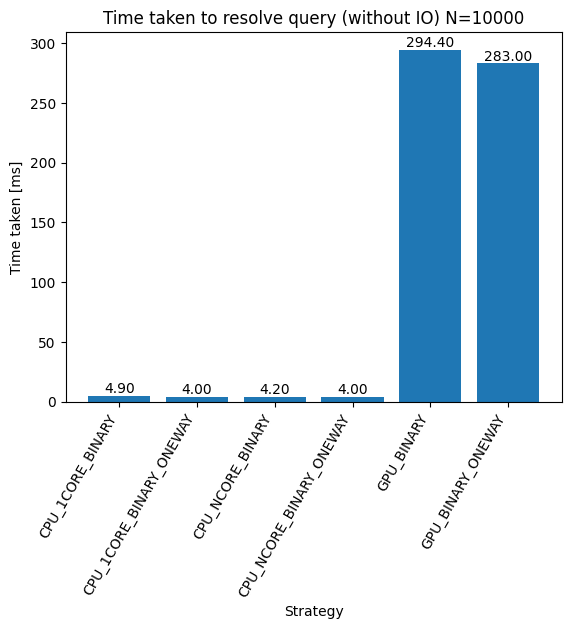

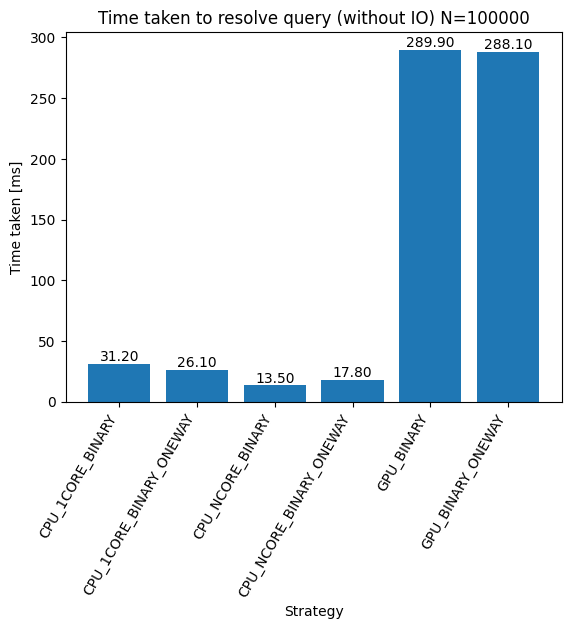

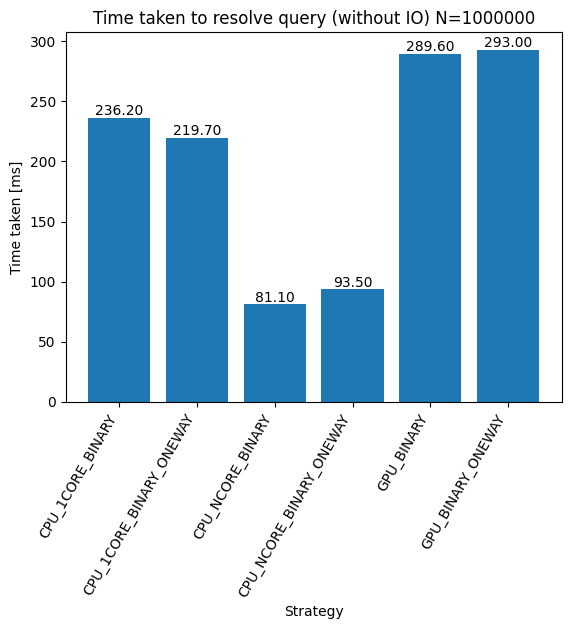

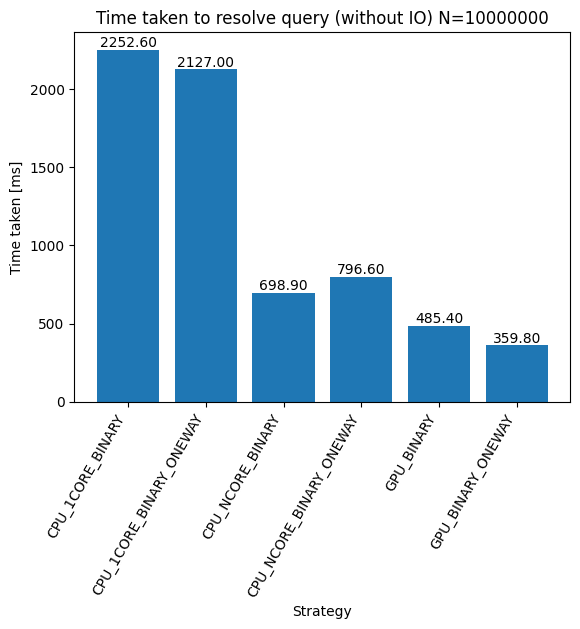

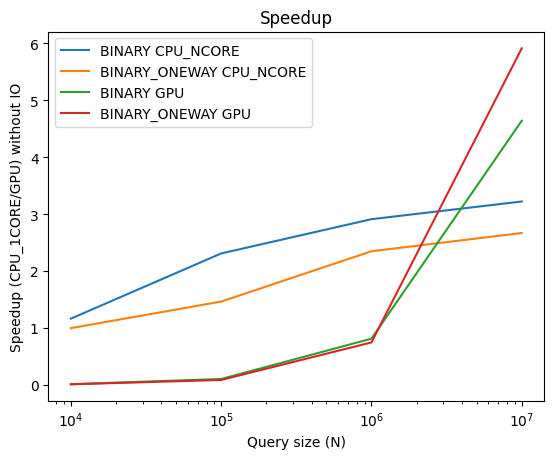

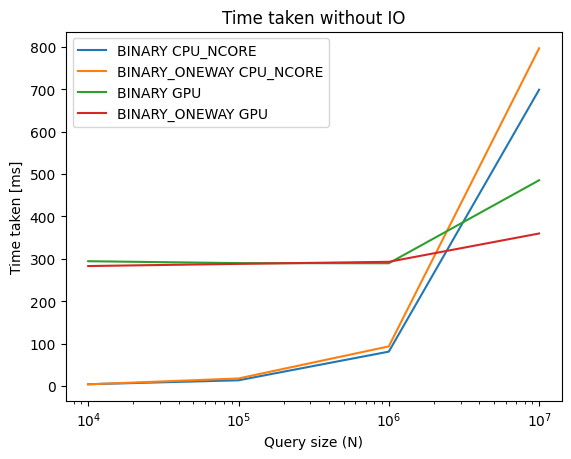

In [4]:
boxplot_time("query_time", "ms", "out")
mean_bar_time("query_time", "ms", "out")
mean_speedup_plot_of_size_by_algorithm("query_time", "ms", "out")
mean_time_plt_of_size_by_algorithm("query_time", "ms", "out")